In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv("glass.csv")
df.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RI      214 non-null    float64
 1   Na      214 non-null    float64
 2   Mg      214 non-null    float64
 3   Al      214 non-null    float64
 4   Si      214 non-null    float64
 5   K       214 non-null    float64
 6   Ca      214 non-null    float64
 7   Ba      214 non-null    float64
 8   Fe      214 non-null    float64
 9   Type    214 non-null    int64  
dtypes: float64(9), int64(1)
memory usage: 16.8 KB


In [6]:
df.describe()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
count,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000
mean,1.518365,13.407850,2.684533,1.444907,72.650935,0.497056,8.956963,0.175047,0.057009,2.780374
std,0.003037,0.816604,1.442408,0.499270,0.774546,0.652192,1.423153,0.497219,0.097439,2.103739
min,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000,1.000000
25%,1.516522,12.907500,2.115000,1.190000,72.280000,0.122500,8.240000,0.000000,0.000000,1.000000
50%,1.517680,13.300000,3.480000,1.360000,72.790000,0.555000,8.600000,0.000000,0.000000,2.000000
75%,1.519157,13.825000,3.600000,1.630000,73.087500,0.610000,9.172500,0.000000,0.100000,3.000000
max,1.533930,17.380000,4.490000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000,7.000000


In [7]:
df['Type'].value_counts()

Type
2    76
1    70
7    29
3    17
5    13
6     9
Name: count, dtype: int64

In [8]:
df.isnull().sum()

RI      0
Na      0
Mg      0
Al      0
Si      0
K       0
Ca      0
Ba      0
Fe      0
Type    0
dtype: int64

<Axes: >

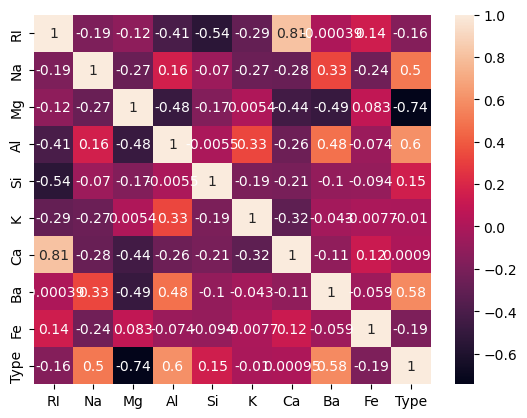

In [9]:
sns.heatmap(df.corr(),annot=True)

array([[<Axes: title={'center': 'RI'}>, <Axes: title={'center': 'Na'}>,
        <Axes: title={'center': 'Mg'}>],
       [<Axes: title={'center': 'Al'}>, <Axes: title={'center': 'Si'}>,
        <Axes: title={'center': 'K'}>],
       [<Axes: title={'center': 'Ca'}>, <Axes: title={'center': 'Ba'}>,
        <Axes: title={'center': 'Fe'}>],
       [<Axes: title={'center': 'Type'}>, <Axes: >, <Axes: >]],
      dtype=object)

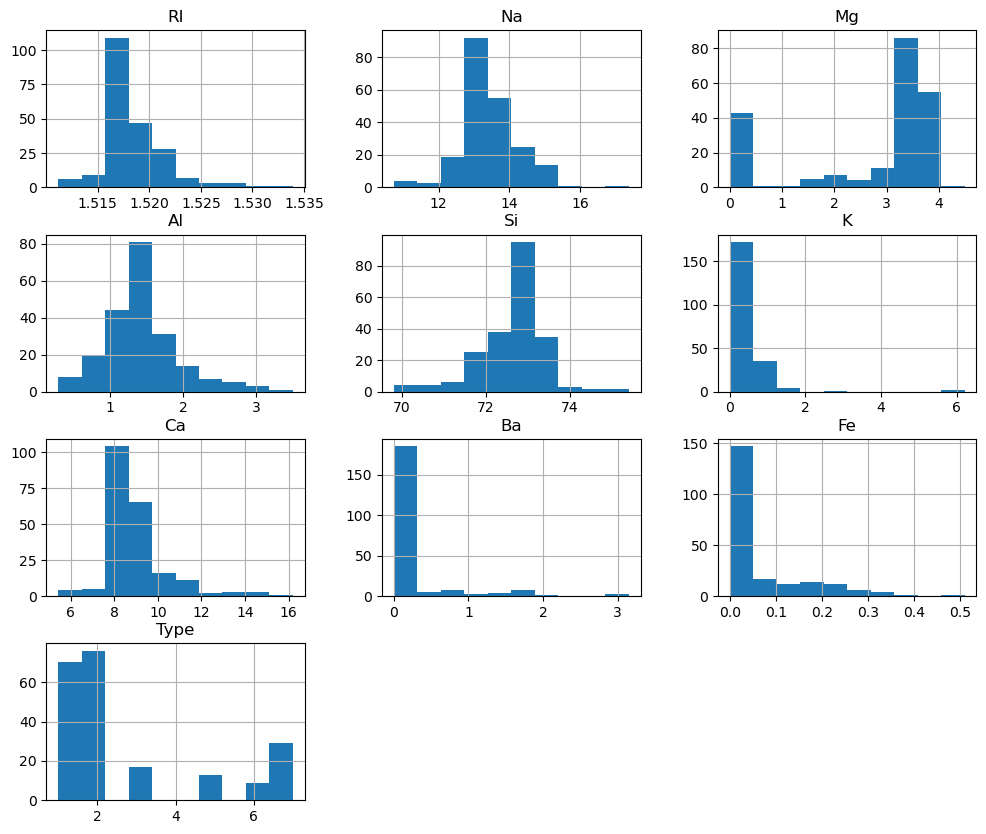

In [10]:
df.hist(figsize=(12,10))

<Axes: >

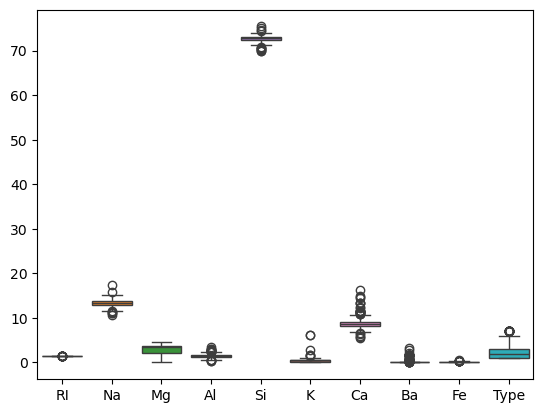

In [11]:
sns.boxplot(data=df)

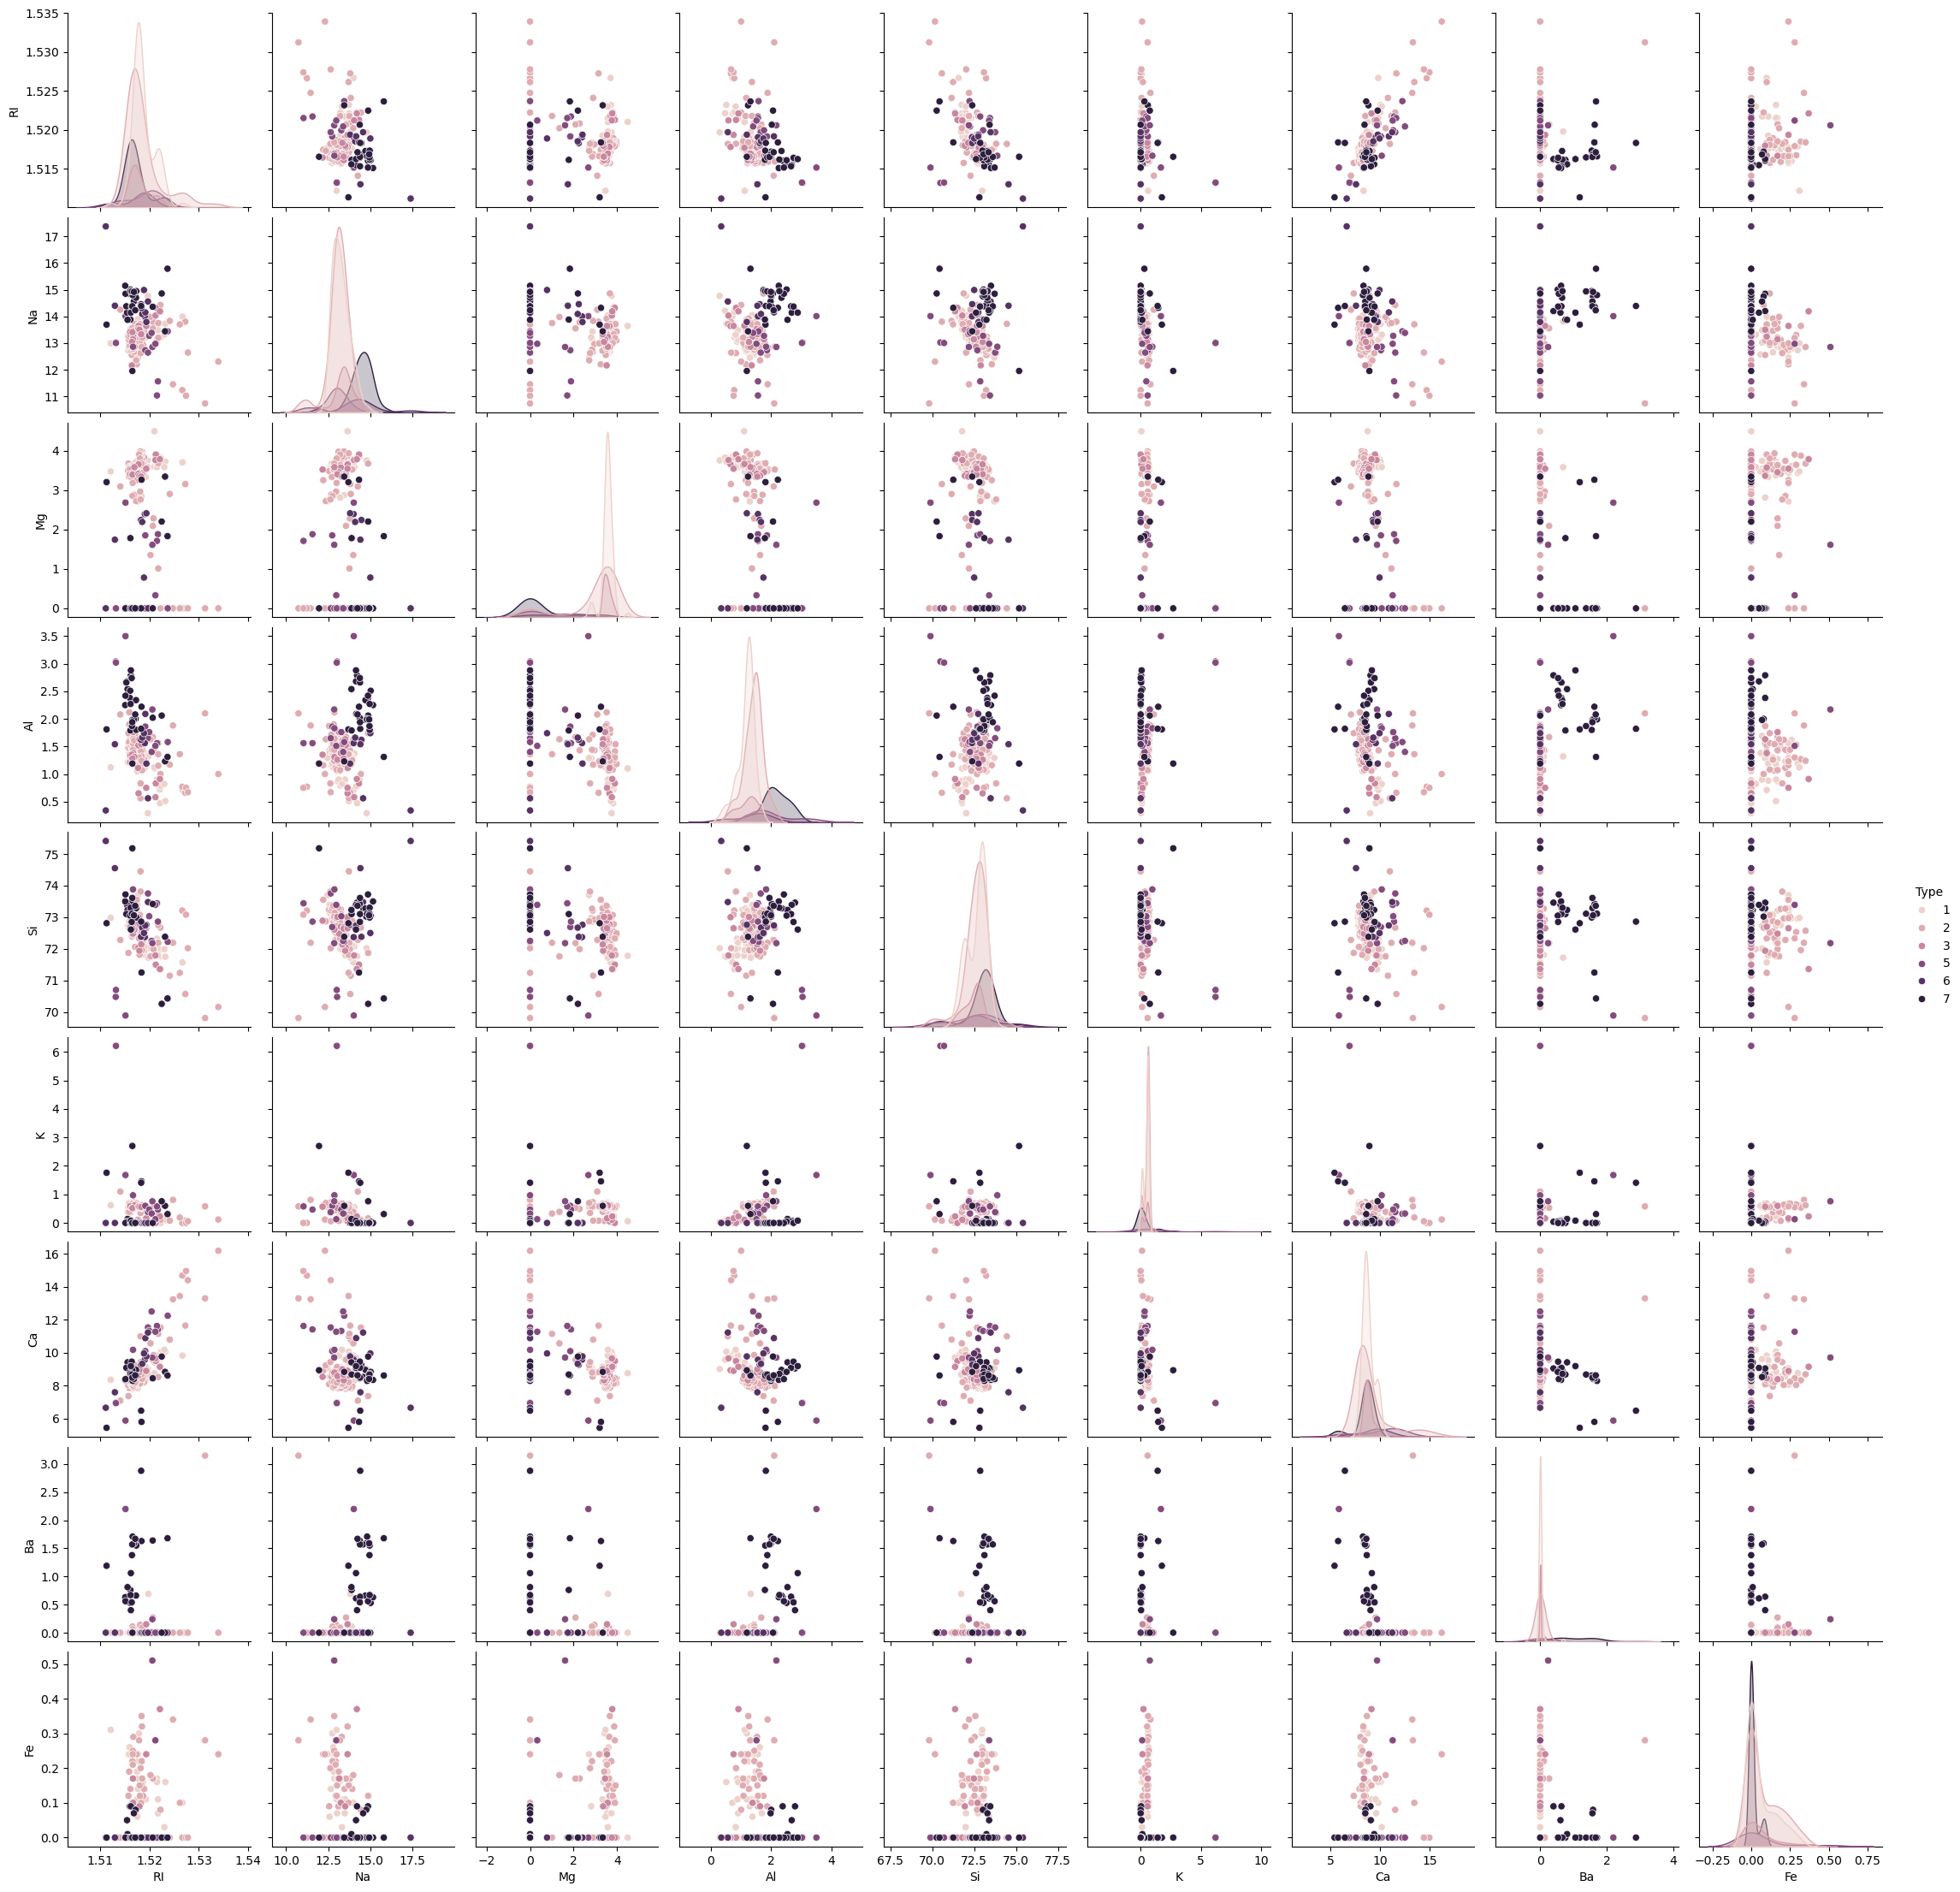

In [13]:
sns.pairplot(df,hue='Type')

In [14]:
X=df.drop("Type",axis=1)
y=df["Type"]

In [17]:
from sklearn.model_selection import train_test_split

In [20]:
from sklearn.preprocessing import StandardScaler

In [21]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=42, stratify=y)


In [22]:
scaler=StandardScaler()
X_train= scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

In [24]:
from sklearn.ensemble import RandomForestClassifier

In [25]:
rf=RandomForestClassifier(n_estimators=200,random_state=42)
rf.fit(X_train,y_train)

RandomForestClassifier(n_estimators=200, random_state=42)

In [26]:
y_pred=rf.predict(X_test)

In [28]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [29]:
accuracy_score(y_test,y_pred)

0.8333333333333334

In [51]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           1       0.77      0.94      0.85        18
           2       0.88      0.74      0.80        19
           3       1.00      0.50      0.67         4
           5       0.67      0.67      0.67         3
           6       0.67      1.00      0.80         2
           7       1.00      1.00      1.00         8

    accuracy                           0.83        54
   macro avg       0.83      0.81      0.80        54
weighted avg       0.85      0.83      0.83        54



#### Baggibg  Classifier

In [33]:
from sklearn.ensemble import BaggingClassifier

In [34]:
bag=BaggingClassifier(estimator=RandomForestClassifier(),n_estimators=50, random_state=42)

In [36]:
bag.fit(X_train,y_train)

BaggingClassifier(estimator=RandomForestClassifier(), n_estimators=50,
                  random_state=42)

In [37]:
y_bag=bag.predict(X_test)

0.8148148148148148

In [40]:
from sklearn.ensemble import AdaBoostClassifier

In [43]:
boost=AdaBoostClassifier(n_estimators=100,random_state=42)
boost.fit(X_train,y_train)

AdaBoostClassifier(n_estimators=100, random_state=42)

In [44]:
y_boost=boost.predict(X_test)

In [46]:
from imblearn.over_sampling import SMOTE

sm = SMOTE(random_state=42)
X_res, y_res = sm.fit_resample(X, y)

print("After SMOTE class distribution:")
print(y_res.value_counts())


After SMOTE class distribution:
Type
1    76
2    76
3    76
5    76
6    76
7    76
Name: count, dtype: int64


In [47]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(
    X_res, y_res, test_size=0.25, random_state=42)


In [48]:
rf2=RandomForestClassifier(n_estimators=200,random_state=42)
rf2.fit(X_train2,y_train2)

RandomForestClassifier(n_estimators=200, random_state=42)

In [49]:
scaler2 = StandardScaler()
X_train2 = scaler2.fit_transform(X_train2)
X_test2 = scaler2.transform(X_test2)


In [50]:
rf2 = RandomForestClassifier(n_estimators=200, random_state=42)
rf2.fit(X_train2, y_train2)

y_pred2 = rf2.predict(X_test2)

print("Accuracy after SMOTE:", accuracy_score(y_test2, y_pred2))
print(classification_report(y_test2, y_pred2))


Accuracy after SMOTE: 0.8947368421052632
              precision    recall  f1-score   support

           1       0.80      0.73      0.76        22
           2       0.86      0.75      0.80        24
           3       0.75      1.00      0.86        12
           5       1.00      1.00      1.00        15
           6       1.00      1.00      1.00        20
           7       0.95      1.00      0.98        21

    accuracy                           0.89       114
   macro avg       0.89      0.91      0.90       114
weighted avg       0.90      0.89      0.89       114



#### 1. Explain Bagging and Boosting methods. How is it different from each other.

Bagging and Boosting are ensemble learning methods that combine multiple models to produce more accurate and stable predictions than a single model could achieve. They differ primarily in how the base models are built and combined. 
Bagging (Bootstrap Aggregating)
Bagging reduces a model's variance and helps prevent overfitting by training multiple independent models in parallel. The process involves creating subsets of the original dataset through bootstrap sampling, training a separate model on each subset, and then aggregating the results (e.g., majority vote for classification, averaging for regression). Random Forest is an example of a bagging algorithm. 
Boosting
Boosting reduces a model's bias by sequentially training multiple models, with each new model attempting to correct the errors of the previous ones. This involves training an initial model, adaptively weighting misclassified data points, and then training subsequent models that focus on these points. The final prediction is a weighted combination of the sequential models' outputs. AdaBoost, Gradient Boosting, and XGBoost are examples of boosting algorithms. 

#### 2. Explain how to handle imbalance in the data.

Imbalanced datasets, where one class is significantly smaller than others, can cause machine learning algorithms to favor the majority class. Several strategies can be employed to address this: 
Data-level methods
These methods modify the dataset to balance class distribution. 
Oversampling: Increases the number of minority class instances, either by randomly duplicating examples or generating synthetic ones using techniques like SMOTE.
Undersampling: Decreases the number of majority class instances, either by random removal or using methods like Tomek links to remove close pairs of opposite-class examples. 
Algorithm-level methods
These approaches adjust the learning algorithm itself. 
Cost-sensitive learning: Assigns higher misclassification costs to the minority class.
Adjusting class weights: Many models allow assigning higher weights to the minority class during training.
Ensemble methods: Some ensemble methods are naturally more robust to imbalance, and balanced bagging classifiers can be used with resampled data.
Anomaly detection: For extreme imbalance, the minority class can be treated as anomalies. 
Evaluation metrics
Accuracy alone is not sufficient for imbalanced data. It's important to use metrics that assess performance on the minority class, such as: 
Confusion matrix
Precision and Recall
F1-Score
ROC-AUC and Precision-Recall Curves 